#### This notebook is about using feature selection techniques to obtain best features for regression. The target is such that Target(t)=Price(t+1)

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from technical_indicators import *

pd.set_option("display.max_columns", 15)
pd.set_option("display.width", 500)
pd.set_option("display.max_rows", 100)

In [11]:
df = pd.read_csv('Data/GBP_USD_Daily.csv', index_col=0)
df = moving_average(df, 5)
df = moving_average(df, 8)
df = moving_average(df, 10)
df = moving_average(df, 13)
df = moving_average(df, 15)
df = moving_average(df, 20)
df = moving_average(df, 21)
df = EMA(df, 5)
df = EMA(df, 10)
df = EMA(df, 15)
df = EMA(df, 20)
df = MACD(df, 12, 26, 9)
df = MACD(df, 21, 55, 13)
df = stochastic_oscillator(df, 5)
df = stochastic_oscillator(df, 8)
df = stochastic_oscillator(df, 10)
df = stochastic_oscillator(df, 13)
df = stochastic_oscillator(df, 15)
df = stochastic_oscillator(df, 20)
df = stochastic_oscillator(df, 21)
df = williams_R(df, 5)
df = williams_R(df, 7)
df = williams_R(df, 8)
df = williams_R(df, 10)
df = williams_R(df, 13)
df = williams_R(df, 14)
df = williams_R(df, 15)
df = williams_R(df, 20)
df = williams_R(df, 21)
df = relative_strength_index(df, 5)
df = relative_strength_index(df, 7)
df = relative_strength_index(df, 8)
df = relative_strength_index(df, 10)
df = relative_strength_index(df, 13)
df = relative_strength_index(df, 14)
df = relative_strength_index(df, 15)
df = relative_strength_index(df, 20)
df = relative_strength_index(df, 21)
df = momentum(df, 5)
df = momentum(df, 7)
df = momentum(df, 8)
df = momentum(df, 10)
df = momentum(df, 13)
df = momentum(df, 14)
df = momentum(df, 15)
df = momentum(df, 20)
df = momentum(df, 21)
df = change_rate(df, 1)
df = change_rate(df, 2)
df = change_rate(df, 3)
df = change_rate(df, 4)
df = change_rate(df, 5)
df = average_true_range(df, 7)
df = average_true_range(df, 14)
df = average_true_range(df, 21)
df = average_directional_index_and_DI(df, 5)
df = average_directional_index_and_DI(df, 7)
df = average_directional_index_and_DI(df, 8)
df = average_directional_index_and_DI(df, 10)
df = average_directional_index_and_DI(df, 13)
df = average_directional_index_and_DI(df, 14)
df = average_directional_index_and_DI(df, 15)
df = average_directional_index_and_DI(df, 20)
df = average_directional_index_and_DI(df, 21)

In [12]:
def regression_target(df, n):
    df['Target'] = df['Price'].shift(-n)
    df.dropna(inplace=True)
    
    return df

# Set how many days look ahead
look_ahead = 1
df = regression_target(df, look_ahead)

In [13]:
# Normalise data
col_name = list(df)
x = df.values

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=col_name)

# # normalized_df = (df-df.min())/(df.max()-df.min())

X = df.iloc[:,:-1]  #independent columns
y = df.iloc[:,-1] # target

In [14]:
from scipy.stats import pearsonr

# {‘pearson’, ‘kendall’, ‘spearman’}
df_corr = df[df.columns[1:]].corr(method='pearson')['Target'][:-1]
df_corr.sort_values(ascending=False, inplace=True)
print(df_corr.head(10))
print(df_corr.tail(10))

df_corr = df_corr.reset_index()
feature_list = list(df_corr['index'].head(20))
print(feature_list)

Low      0.998499
High     0.998383
ema5     0.998106
Open     0.997887
5ma      0.997677
ema10    0.996835
8ma      0.996654
10ma     0.995952
ema15    0.995547
13ma     0.994930
Name: Target, dtype: float64
%R W21   -0.112342
-DI 13   -0.113836
ADX 14   -0.114117
-DI 14   -0.118676
ADX 15   -0.123041
-DI 15   -0.123373
-DI 20   -0.145139
-DI 21   -0.149197
ADX 20   -0.169514
ADX 21   -0.178584
Name: Target, dtype: float64
['Low', 'High', 'ema5', 'Open', '5ma', 'ema10', '8ma', '10ma', 'ema15', '13ma', '15ma', 'ema20', '20ma', '21ma', 'RSI 21', 'RSI 20', '+DI 21', '+DI 20', 'RSI 15', 'RSI 14']


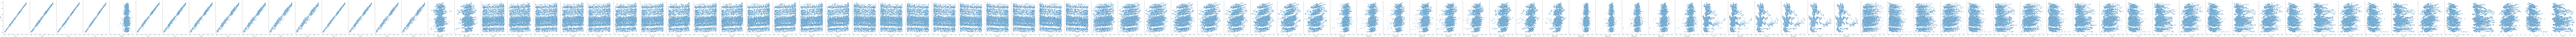

In [15]:
import seaborn as sns

# print(col_name[:-1])
sns.pairplot(df, x_vars=col_name[:-1], y_vars=col_name[-1], height=7, aspect=0.7)

Price            0.535
Low              0.080
High             0.055
change_rate 5    0.045
MACD_12,26,9     0.040
ema5             0.035
momentum 20      0.030
Open             0.020
momentum 14      0.020
21ma             0.015
Change           0.010
13ma             0.010
momentum 5       0.010
momentum 7       0.010
change_rate 1    0.010
-DI 5            0.010
-DI 10           0.010
5ma              0.005
15ma             0.005
ema10            0.005
dtype: float64
['Price', 'Low', 'High', 'change_rate 5', 'MACD_12,26,9', 'ema5', 'momentum 20', 'Open', 'momentum 14', '21ma', 'Change', '13ma', 'momentum 5', 'momentum 7', 'change_rate 1', '-DI 5', '-DI 10', '5ma', '15ma', 'ema10']


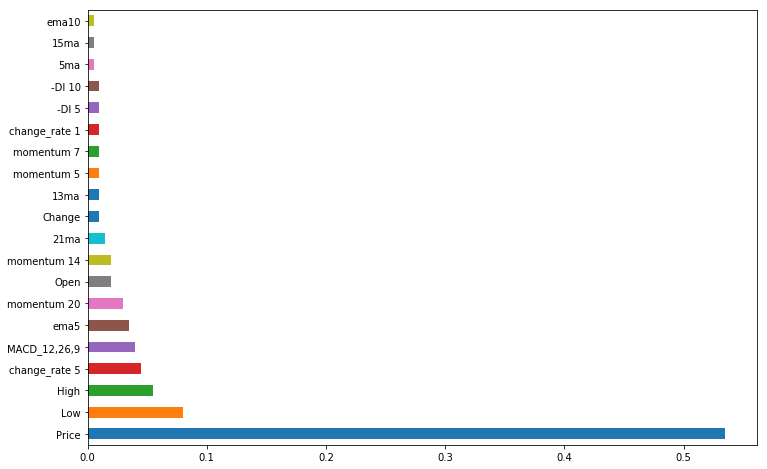

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

clf = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X, y)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(12,8))

tmp_df = feat_importances.nlargest(20)
print(tmp_df)
print(tmp_df.index.tolist())

plt.show()

Price            0.809579
Low              0.130518
ema5             0.054300
High             0.003824
momentum 21      0.000059
MACD_21,55,13    0.000055
momentum 7       0.000050
ADX 5            0.000044
Open             0.000043
momentum 20      0.000042
MACD_12,26,9     0.000038
change_rate 2    0.000038
ADX 21           0.000036
+DI 21           0.000036
momentum 13      0.000034
momentum 8       0.000034
momentum 15      0.000033
ATR_scaled 7     0.000032
ADX 20           0.000032
momentum 5       0.000031
dtype: float64
['Price', 'Low', 'ema5', 'High', 'momentum 21', 'MACD_21,55,13', 'momentum 7', 'ADX 5', 'Open', 'momentum 20', 'MACD_12,26,9', 'change_rate 2', 'ADX 21', '+DI 21', 'momentum 13', 'momentum 8', 'momentum 15', 'ATR_scaled 7', 'ADX 20', 'momentum 5']


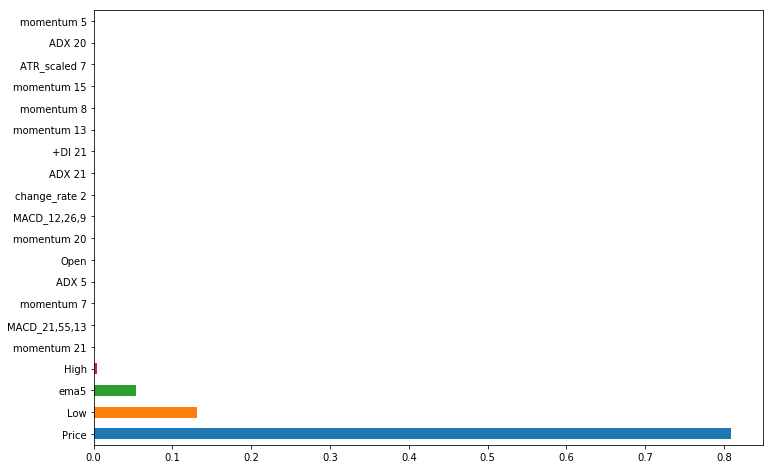

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

clf = RandomForestRegressor().fit(X, y)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(12,8))

tmp_df = feat_importances.nlargest(20)
print(tmp_df)
print(tmp_df.index.tolist())

plt.show()